In [92]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as pl

In [93]:
# read all confirmed planets from the exoplanet archive
targets = Table.read('../targets.txt', format='ascii', comment='#')

In [94]:
transit_time = np.array([targets['pl_tranmid'] + i*targets['pl_orbper'] for i in range(100)]).T
from astropy.time import Time

def tobjd(time):
    return Time(time, format='isot', scale='utc').jd

import matplotlib.dates as dates
plot_date = lambda jd: dates.datestr2num([(Time(jd, format='jd').iso)[:10] for jd in jd])

In [95]:
vis = np.loadtxt('../../visibility/jwst_gtvt/{0}.dat'.format(stname), skiprows=19, converters={0: tobjd})
windows = np.loadtxt(open('../../visibility/jwst_gtvt/{0}.dat'.format(stname)).readlines()[9:13], converters={0: tobjd, 1: tobjd})
breaks = [np.where(np.isclose(vis[:, 0], windows[:,1][i], rtol=1e-12))[0][0] for i in range(len(windows))]
breaks = np.insert(breaks, 0, 0)

<ipython-input-128-46fb2226d8ec>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');


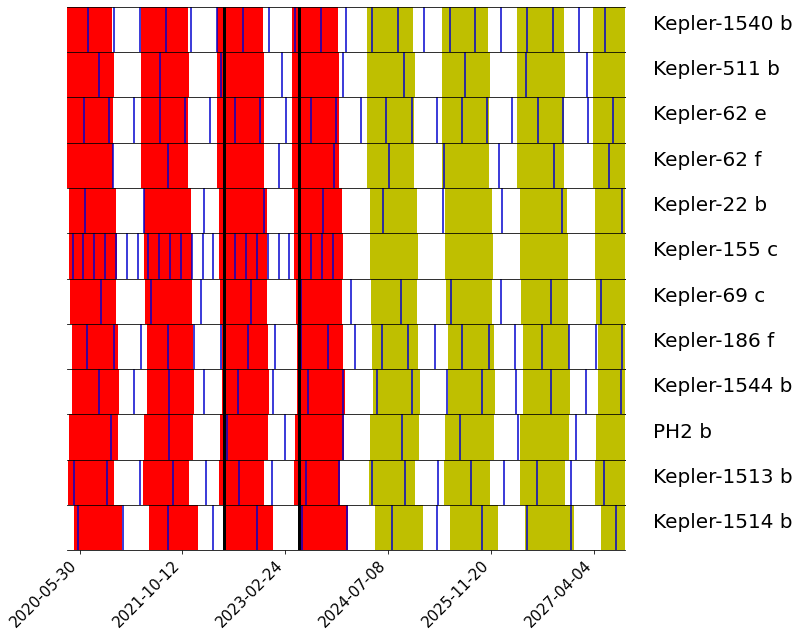

In [128]:
stnames = ['Kepler-1540', 
           'Kepler-511',
           'Kepler-62', 
           'Kepler-62',
           'Kepler-22',
           'Kepler-155',
           'Kepler-69',
           'Kepler-186',
           'Kepler-1544',
           'PH2',
           'Kepler-1513',
           'Kepler-1514']
plnames = ['Kepler-1540 b',
           'Kepler-511 b', 
           'Kepler-62 e', 
           'Kepler-62 f',
           'Kepler-22 b',
           'Kepler-155 c',
           'Kepler-69 c',
           'Kepler-186 f',
           'Kepler-1544 b',
           'PH2 b',
           'Kepler-1513 b',
           'Kepler-1514 b']
fig, axs = pl.subplots(len(stnames), 1, figsize=(10, 10), sharex=True)
pl.subplots_adjust(hspace=0)
minstart = np.inf
maxend = -np.inf
for ax, s, p in zip(axs, stnames, plnames):
    vis = np.loadtxt('../../visibility/jwst_gtvt/{0}.dat'.format(s), skiprows=19, converters={0: tobjd})
    windows = np.loadtxt(open('../../visibility/jwst_gtvt/{0}.dat'.format(s)).readlines()[9:13], converters={0: tobjd, 1: tobjd})
    breaks = [np.where(np.isclose(vis[:, 0], windows[:,1][i], rtol=1e-12))[0][0] for i in range(len(windows))]
    breaks = np.insert(breaks, 0, 0)
    i = np.where(targets['pl_name'] == p)[0][0]
    if windows[:, 0][0] < minstart:
        minstart = windows[:, 0][0]
    if windows[:, 1][-1] > maxend:
        maxend = windows[:, 1][-1]
    start = windows[:, 0]
    end = windows[:, 1]

    transits = transit_time[i]

    [ax.axvline(t, color='mediumblue') for t in transits]
    [ax.axvspan(s, e, color='r', linewidth=3) for s, e in zip(start, end)]
    
    start_projected = start + 365.25*4
    end_projected = end + 365.25*4
    [ax.axvspan(s, e, color='y', linewidth=3) for s, e in zip(start_projected, end_projected)]
    
    ax.set_ylim(0, 2)
    ax.set_yticks(ticks=[])
    ax.set_yticklabels([], fontsize=15)
    ax.annotate(p, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=20)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
pl.xlim(minstart, maxend + (maxend-minstart))
x_ticks_labels = [t[:10] for t in Time(pl.xticks()[0], format='jd').iso]
pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');
pl.savefig('visibility.pdf')